# Domain Adaptation

- Implementation of the paper [Domain-Adversarial Training of Neural Networks](https://arxiv.org/pdf/1505.07818.pdf)
- The datasets used in this demo are available [here](https://drive.google.com/drive/folders/1-GSAgz0IBT8LWbn2p1gApsLoeqMpAsOo?usp=sharing)

In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pylab as plt
from skimage.color import gray2rgb
from skimage.transform import resize

In [2]:
# Loading source domain data
with open('..//Data/mnist_data.pkl', 'rb') as f:
    mnist = pickle.load(f)

x_source_train = mnist["train"]
y_source_train = mnist["train_labels"]
x_source_val = mnist["val"]
y_source_val  = mnist["val_labels"]
x_source_test = mnist["test"]
y_source_test = mnist["test_labels"]

# Loading target domain data
with open('..//Data/mnistm_data.pkl', 'rb') as f:
    mnistm = pickle.load(f)

x_target_train = mnistm["train"]
y_target_train = mnistm["train_labels"]
x_target_val = mnistm["val"]
y_target_val  = mnistm["val_labels"]
x_target_test = mnistm["test"]
y_target_test = mnistm["test_labels"]

print(y_target_test.shape)
print(x_target_test.shape)

(10000,)
(10000, 28, 28, 3)


In [3]:
def process_mnist(x):
    x = np.moveaxis(x, 0, -1)
    if x.ndim == 3:
        x = resize(x, (32, 32), anti_aliasing=True, mode='constant')
    else:
        x = resize(x, (32, 32,3), anti_aliasing=True, mode='constant')
    x = np.moveaxis(x, -1, 0)
    if x.ndim == 3:
        return gray2rgb(x).astype("float32")
    else:
        return x.astype("float32")


x_source_train = process_mnist(x_source_train)
x_source_val = process_mnist(x_source_val)
x_source_test = process_mnist(x_source_test)

x_target_train = process_mnist(x_target_train)
x_target_val = process_mnist(x_target_val)
x_target_test = process_mnist(x_target_test)

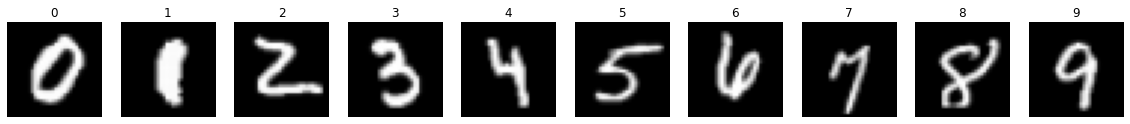

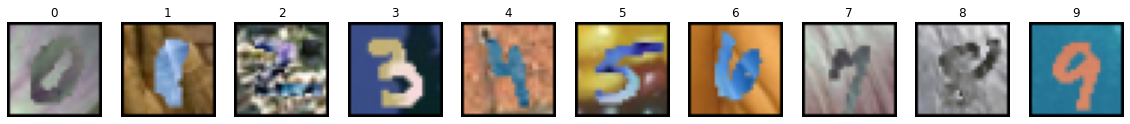

In [4]:
plt.figure(figsize=(20, 15))
for i, digit in enumerate(np.unique(y_source_train), start=1):
    index = np.where(y_source_train == digit)[0][0]
    ax = plt.subplot(1, 10, i)
    ax.imshow(x_source_train[index])
    ax.axis("off")
    ax.set_title(digit)
    
plt.figure(figsize=(20, 15))
for i, digit in enumerate(np.unique(y_target_train), start=1):
    index = np.where(y_source_train == digit)[0][0]
    ax = plt.subplot(1, 10, i)
    ax.imshow(x_target_train[index])
    ax.axis("off")
    ax.set_title(digit)

In [ ]:
# Model with no domain adaptation

In [21]:
#Gradient Reversal Layer
@tf.custom_gradient
def gradient_reverse(x, lamda=1.0):
    y = tf.identity(x)
    
    def grad(dy):
        return lamda * -dy, None
    
    return y, grad


class GradientReversalLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
    
    def call(self, x, lamda=1.0):
        return gradient_reverse(x, lamda)


class DANN(tf.keras.models.Model):
    def __init__(self):
        super().__init__()
        
        #Feature Extractor
        
        #Label Predictor
        self.label_predictor_layer0 = tf.keras.layers.Dense(100, activation='relu')
        self.label_predictor_layer1 = tf.keras.layers.Dense(100, activation='relu')
        self.label_predictor_layer2 = tf.keras.layers.Dense(10, activation='softmax')
        
        #Domain Predictor
        
    def call(self, x, train=False, source_train=True, lamda=1.0):
        #Feature Extractor
        
        #Label Predictor
        
        #Domain Predictor
        

model = DANN())